In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [3]:
from utils import Scene, CharacterLine, StageDirection, load_scenes_from_folder
from typing import List

In [4]:
scenes = load_scenes_from_folder('../raws')

In [5]:
cl = 0
sd = 0

for scene in scenes:
    for line in scene.actions:
        if isinstance(line, CharacterLine):
            cl += 1
        else:
            sd += 1

print(f"Character lines and stage directions rate: {cl=} {sd=} {sd/cl=:.2}")

Character lines and stage directions rate: cl=59332 sd=4288 sd/cl=0.072


In [6]:
from collections import Counter

actors_counter = Counter()

for scene in scenes:
    for line in scene.actions:
        if isinstance(line, CharacterLine):
            actors_counter[line.actor] += 1

In [7]:
names = [x[0] for x in actors_counter.most_common(100)]
counts = [x[1] for x in actors_counter.most_common(100)]

Text(0.5, 0, 'Number of lines (linear scale)')

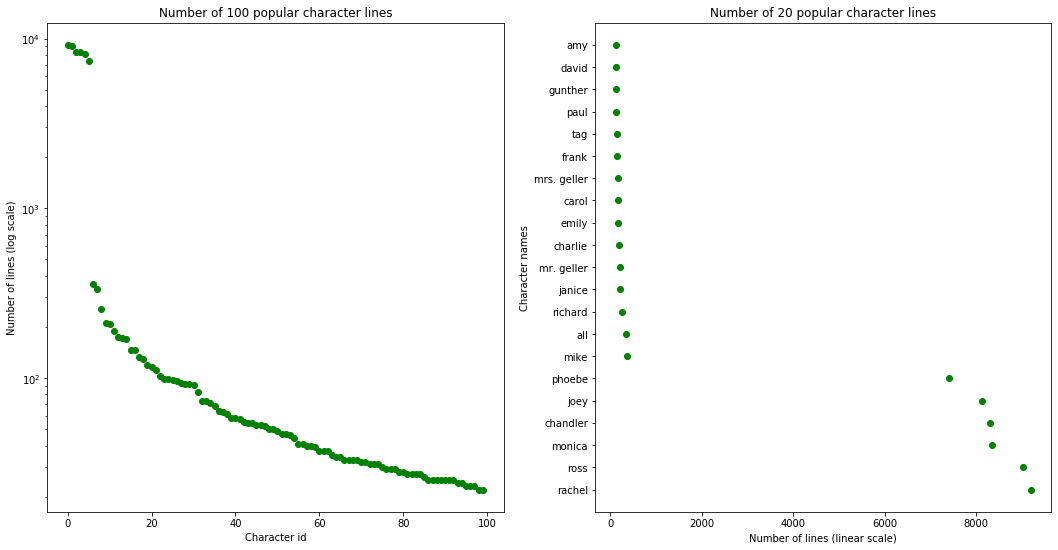

In [8]:
plt.figure(figsize=[18, 9])

plt.subplot(1, 2, 1)
plt.plot(counts, 'go')
plt.title('Number of 100 popular character lines')
plt.yscale('log')
plt.ylabel('Number of lines (log scale)')
plt.xlabel('Character id')

plt.subplot(1, 2, 2)
plt.plot(counts[:21], names[:21], 'go')
plt.title('Number of 20 popular character lines')
plt.ylabel('Character names')
plt.xlabel('Number of lines (linear scale)')